In [55]:
import main
import plot_inequality as plot_ineq
import io_manager
import calibration as calib
import time
import importlib
import numpy as np
importlib.reload(calib)
importlib.reload(plot_ineq)
importlib.reload(main)
#run stuff here
start_time = time.perf_counter()
print("Running main")

# ***** may want to change how trans is generated its redundant in do file.
of_name = None
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
trans_path = main_path + "input/50p_age_moms/MH_trans_by_MH_clust_age.csv"
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
do_phi_H_calib = False
const_phi_H = 0.001
# const_phi_H = 0.1

myPars = main.pars_factory(main_path = main_path, H_trans_path = trans_path)
myPars.phi_H = const_phi_H

myPars, myShocks, sols, sims = main.main_io(main_path, myPars = myPars, out_folder_name = of_name, output_flag = False,
                                            H_trans_path = trans_path, do_phi_H_calib=do_phi_H_calib)


Running main
Using health transition matrix from: C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/input/50p_age_moms/MH_trans_by_MH_clust_age.csv
*****Running main_io with default out_folder_name*****
Solver ran in 0.4052317999994557 seconds
Calibrating with alpha_lab_targ = 0.33496439, w0_mean_targ = 9.4541645, w0_sd_targ = 3.2013602, 
                                        w1_targ = 0.3406973883314617, w2_targ = 0.3031905120658842, wH_targ = 0.035280712, phi_H_target = 0.02408891
***** Calibration iteration 0 *****
***** Calibration iteration 1 *****
***** Calibration iteration 2 *****
***** Calibration iteration 3 *****
***** Calibration iteration 4 *****
***** Calibration iteration 5 *****
***** Calibration iteration 6 *****
***** Calibration iteration 7 *****
***** Calibration iteration 8 *****
***** Calibration iteration 9 *****
***** Calibration iteration 10 *****
***** Calibration iteration 11 *****
***** Calibration iteration 12

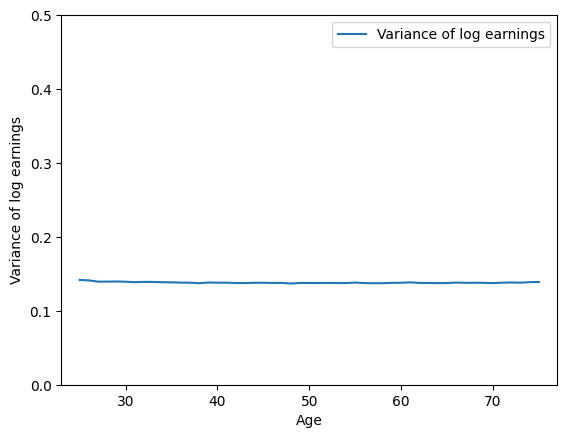

In [56]:
import numpy as np
import my_toolbox as tb
importlib.reload(tb)
importlib.reload(plot_ineq)
# my_age_grid = myPars.age_grid[:31] # only want to plot up to age 55
my_age_grid = myPars.age_grid
outpath = main_path + "output/var_earn_test_fig.pdf"
input_path = main_path + "input/50p_age_moms/"
plot_save_path = main_path + "validation/" 

y_axis_label_var = "Variance of log earnings"
y_lim = [0.0, 0.5]
fig_var_log_mod, ax_var_log_mod = plot_ineq.plot_var_log_sim(myPars, sims["lab_earnings"], y_axis_label_var, 
                                                            outpath = outpath, y_lim = y_lim, 
                                                            quietly = False, full_age_grid = True)

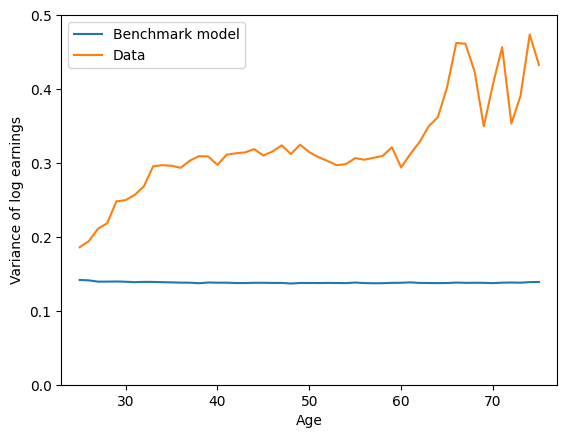

In [57]:
# input_path = main_path + "input/k2_moms/"
input_path = main_path + "input/50p_age_moms/"
plot_save_path = main_path + "validation/" + "validating_var_earn" + ".pdf"
# quietly = True
label_lists = [["Benchmark model"], ["Data"]]
line_colors = ["C0", "C1"] # these are the standard matplotlib colors

var_log_earns_data = tb.read_specific_column_from_csv(input_path + "var_earn_moments.csv", 1)
fig_var_log_data, ax_var_log_data = tb.plot_lc_mom_by_age(var_log_earns_data, my_age_grid, y_axis_label_var,
                                                          save_path = plot_save_path,  quietly = True)

y_lim = [0, 0.5]
fig_combined, ax_combined = tb.combine_plots([(fig_var_log_mod, ax_var_log_mod), (fig_var_log_data, ax_var_log_data)], 
                                              label_lists = label_lists, colors = line_colors, y_lim = y_lim) 

In [58]:

# import pandas as pd
# import matplotlib.pyplot as plt

# end_of_beg = 10
# end_of_mid = 40

# # flatten the sim array to the last/age dimension and convert to a dataframe
# sim_flat = sim.reshape(-1, sim.shape[-1])
# sim_df = pd.DataFrame(sim_flat)
# # drop the last column
# sim_df = sim_df.iloc[:, :-1]
# # create new df containing first 15 columns
# sim_df_beg = pd.melt(sim_df.iloc[:, :end_of_beg])
# sim_df_mid = pd.melt(sim_df.iloc[:, end_of_beg:end_of_mid])
# sim_df_end = pd.melt(sim_df.iloc[:, end_of_mid:])
# #logs of data frames
# log_sim_flat = log_sim.reshape(-1, log_sim.shape[-1])
# log_sim_df = pd.DataFrame(log_sim_flat)
# log_sim_df = log_sim_df.iloc[:, :-1]
# log_sim_df_beg = pd.melt(log_sim_df.iloc[:, :end_of_beg])
# log_sim_df_mid = pd.melt(log_sim_df.iloc[:, end_of_beg:end_of_mid])
# log_sim_df_end = pd.melt(log_sim_df.iloc[:, end_of_mid:])

# def df_single_hist(df: pd.DataFrame, figure_title: str = None) -> None:
#     data = df.values.flatten()  # Flatten the DataFrame to a single array
#     # Compute the histogram (without density)
#     counts, bins, patches = plt.hist(data, bins=3)
#     total_count = np.sum(counts)
#     proportions = counts / total_count
#     # Update the heights of the bars to reflect proportions
#     for proportion, patch in zip(proportions, patches):
#         patch.set_height(proportion)
#     plt.ylim(0, 1)
#     if figure_title is not None:
#         plt.title(figure_title)
    
#     plt.show()

# beg_suffix = f" for ages 25 to {25 + end_of_beg-1}"
# mid_suffix = f" for ages {25 + end_of_beg} to {25 + end_of_mid-1}"
# end_suffix = f" for ages {25 + end_of_mid} to 75"

# base_title = "Distribution of simulated earnings"    
# df_single_hist(sim_df_beg, base_title + beg_suffix)
# df_single_hist(sim_df_mid, base_title + mid_suffix)
# df_single_hist(sim_df_end, base_title + end_suffix)

# log_base_title = "Distribution of simulated log earnings"
# df_single_hist(log_sim_df_beg, log_base_title + beg_suffix)
# df_single_hist(log_sim_df_mid, log_base_title + mid_suffix)
# df_single_hist(log_sim_df_end, log_base_title + end_suffix)